In [2]:
from life_saving_tools.files import Files

In [4]:
f = Files.FileOrganizer()

In [2]:
def create_content(notebook_path, return_string = False):
    print("Converting the Notebook to HTML.")
    notebook = nbformat.read(notebook_path, as_version=4)
    html_exporter = HTMLExporter(template_name="classic")
    (body, _) = html_exporter.from_notebook_node(notebook)
    soup = bs4.BeautifulSoup(body)
    
    print("Looking for the Headers and their positions.")
    headers = {
    "h1":[],
    "h2":[],
    "h3":[],
    "h4":[],
    "h5":[],
    "h6":[]
    }

    for hs in headers.keys():
        headers[hs] = soup.select(hs)

    positions = {
        "h1":[],
        "h2":[],
        "h3":[],
        "h4":[],
        "h5":[],
        "h6":[]
    }
    all = []
    for hs in positions.keys():
        positions[hs] = [str(soup).find(str(h)) for h in headers[hs]]
        all.extend(positions[hs])
    all.sort()
    positions["all"] = all

    print("Getting correct order of the Headers.")
    correct_order = []
    for i in positions["all"]:
        for keys in positions.keys():
            if i in positions[keys]:
                correct_order.append(keys)
                break
    
    index = []
    for order in correct_order:
        index.append(headers[order][0])
        headers[order].pop(0)

    print("Creating the Contents.")
    start = "<ol>"
    end = "</ol>"
    string =  f"""<h2 id="Contents">Contents<a href="#Contents"></a></h2>
    {start}
    """
    current_header = "h1"
    for i, order in enumerate(correct_order):
        previous_header = current_header
        current_header = order
        to_add = f"""<li>{str(index[i].select('a')[0]).replace("¶", index[i].get_text()[:-1]).replace("anchor-link", "")}</li>\n"""
        if previous_header == current_header:
            string+= to_add

        elif int(previous_header[-1]) < int(current_header[-1]):
            string += start
            string+= to_add
            
        elif int(previous_header[-1]) > int(current_header[-1]):
            string += end
            string+= to_add
    string+= end
    pyperclip.copy(string)
    print("Content copied to clipboard.")
    if return_string:
        return string
    else:
        return None
    

In [3]:
notebook_path = "Numerical_Integration.ipynb"
create_content(notebook_path, return_string = False)

Converting the Notebook to HTML.
Looking for the Headers.
Getting correct order of the Headers.
Creating the Contents.
Content copied to clipboard.


## Getting heading Tags

In [3]:
soup.select("h2")

[<h2 id="Differentiation-Using-Taylor-Series">Differentiation Using Taylor Series<a class="anchor-link" href="#Differentiation-Using-Taylor-Series">¶</a></h2>,
 <h2 id="Implementation-with-Examples">Implementation with Examples<a class="anchor-link" href="#Implementation-with-Examples">¶</a></h2>,
 <h2 id="Other-Methods">Other Methods<a class="anchor-link" href="#Other-Methods">¶</a></h2>,
 <h2 id="Remarks">Remarks<a class="anchor-link" href="#Remarks">¶</a></h2>]

In [4]:
soup.select("h1")[1].get_attribute_list("id")

['Differentiation']

In [5]:
soup.select("h2")

[<h2 id="Differentiation-Using-Taylor-Series">Differentiation Using Taylor Series<a class="anchor-link" href="#Differentiation-Using-Taylor-Series">¶</a></h2>,
 <h2 id="Implementation-with-Examples">Implementation with Examples<a class="anchor-link" href="#Implementation-with-Examples">¶</a></h2>,
 <h2 id="Other-Methods">Other Methods<a class="anchor-link" href="#Other-Methods">¶</a></h2>,
 <h2 id="Remarks">Remarks<a class="anchor-link" href="#Remarks">¶</a></h2>]

In [67]:
headers = {
    "h1":[],
    "h2":[],
    "h3":[],
    "h4":[],
    "h5":[],
    "h6":[]
}

for hs in headers.keys():
    headers[hs] = soup.select(hs)

positions = {
    "h1":[],
    "h2":[],
    "h3":[],
    "h4":[],
    "h5":[],
    "h6":[]
}
all = []
for hs in positions.keys():
    positions[hs] = [str(soup).find(str(h)) for h in headers[hs]]
    all.extend(positions[hs])
all.sort()
positions["all"] = all


In [68]:
# positions

1. Start from the first header.
2. Note the next heading position in that header.
3. Move to the other set of headers and see if the position of that header is between the previous two headers in the upper level. 
4. If yes, note them else move to the next levels of headers and do the same till you reach on the last level.
5. Repeat the procedure for next set of headers.

In [69]:
correct_order = []
for i in positions["all"]:
    for keys in positions.keys():
        if i in positions[keys]:
            correct_order.append(keys)
            # print(keys)
            break

In [70]:
correct_order

['h1',
 'h1',
 'h2',
 'h3',
 'h4',
 'h4',
 'h4',
 'h4',
 'h4',
 'h4',
 'h3',
 'h3',
 'h2',
 'h3',
 'h4',
 'h4',
 'h4',
 'h4',
 'h4',
 'h4',
 'h3',
 'h3',
 'h2',
 'h3',
 'h3',
 'h2']

In [71]:
index = []
for order in correct_order:
    # print(order)
    # print(headers[order])
    index.append(headers[order][0])
    headers[order].pop(0)
    # print(positions[order])
    # print("\n")

In [102]:
start = "<ol>"
end = "</ol>"
string =  f"""<h2 id="Contents">Contents<a href="#Contents"></a></h2>
{start}
"""
current_header = "h1"
for i, order in enumerate(correct_order):
    previous_header = current_header
    current_header = order
    to_add = f"""<li>{str(index[i].select('a')[0]).replace("¶", index[i].get_text()[:-1]).replace("anchor-link", "")}</li>\n"""
    if previous_header == current_header:
        string+= to_add

    elif int(previous_header[-1]) < int(current_header[-1]):
        string += start
        string+= to_add
        
    elif int(previous_header[-1]) > int(current_header[-1]):
        string += end
        string+= to_add
string+= end
pyperclip.copy(string)


<ol>
<li><a class="" href="#Imports">Imports</a></li>
<li><a class="" href="#Differentiation">Differentiation</a></li>
<ol><li><a class="" href="#Differentiation-Using-Taylor-Series">Differentiation Using Taylor Series</a></li>
<ol><li><a class="" href="#Forwards-Difference">Forwards Difference</a></li>
<ol><li><a class="" href="#First-Order-Derivative">First Order Derivative</a></li>
<li><a class="" href="#Second-Order-Derivative">Second Order Derivative</a></li>
<li><a class="" href="#First-Order-Derivative">First Order Derivative</a></li>
<li><a class="" href="#Second-Order-Derivative">Second Order Derivative</a></li>
<li><a class="" href="#First-Order-Derivative">First Order Derivative</a></li>
<li><a class="" href="#Second-Order-Derivative">Second Order Derivative</a></li>
</ol><li><a class="" href="#Backwards-Difference">Backwards Difference</a></li>
<li><a class="" href="#Central-Difference">Central Difference</a></li>
</ol><li><a class="" href="#Implementation-with-Examples">Implementation with Examples</a></li>
<ol><li><a class="" href="#First-Order-Derivatives">First Order Derivatives</a></li>
<ol><li><a class="" href="#Forward-Difference">Forward Difference</a></li>
<li><a class="" href="#Backwards-Difference">Backwards Difference</a></li>
<li><a class="" href="#Central-Difference">Central Difference</a></li>
<li><a class="" href="#Forward-Difference">Forward Difference</a></li>
<li><a class="" href="#Backwards-Difference">Backwards Difference</a></li>
<li><a class="" href="#Central-Difference">Central Difference</a></li>
</ol><li><a class="" href="#Second-Order-Derivative">Second Order Derivative</a></li>
<li><a class="" href="#Comparison-of-the-Different-Methods">Comparison of the Different Methods</a></li>
</ol><li><a class="" href="#Other-Methods">Other Methods</a></li>
<ol><li><a class="" href="#Richardson-Extrapolation">Richardson Extrapolation</a></li>
<li><a class="" href="#Finite-Divided-Difference-Approximation">Finite Divided Difference Approximation</a></li>
</ol><li><a class="" href="#Remarks">Remarks</a></li>
</ol>

<h2 id="Contents">Contents<a href="#Contents"></a></h2>

In [ ]:
string = """<h2 id="Content">Content<a href="#Content"></a></h2>
<ol>
<li>
Item 1
<ol>
<li>
Item 11
</li>
</ol>
</ol>
"""

In [1]:
from tools.files import notebook

In [2]:
N = notebook.Notebook()
notebooks = N.notebooks
notebooks[0]

'.\\Curve_Fitting.ipynb'

In [3]:
notebooks

['.\\Curve_Fitting.ipynb',
 '.\\Eigenvalue_Eigenvector.ipynb',
 '.\\Interpolation2.ipynb',
 '.\\Numerical_Differentiation.ipynb',
 '.\\Numerical_Integration.ipynb',
 '.\\ODE.ipynb',
 '.\\Root_Finding.ipynb',
 '.\\temp.ipynb']

In [3]:
N.export_directory()

Exporting notebooks...: 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]


['.\\.\\Curve_Fitting.html',
 '.\\.\\Eigenvalue_Eigenvector.html',
 '.\\.\\Interpolation2.html',
 '.\\.\\Numerical_Differentiation.html',
 '.\\.\\Numerical_Integration.html',
 '.\\.\\ODE.html',
 '.\\.\\Root_Finding.html',
 '.\\.\\temp.html']

In [4]:
e = ValueError

In [5]:
e==ValueError

True

## Algebra

In [1]:
from tools.maths.algebra import CurveFitting, RootFinding
import numpy as np
import matplotlib.pyplot as plt

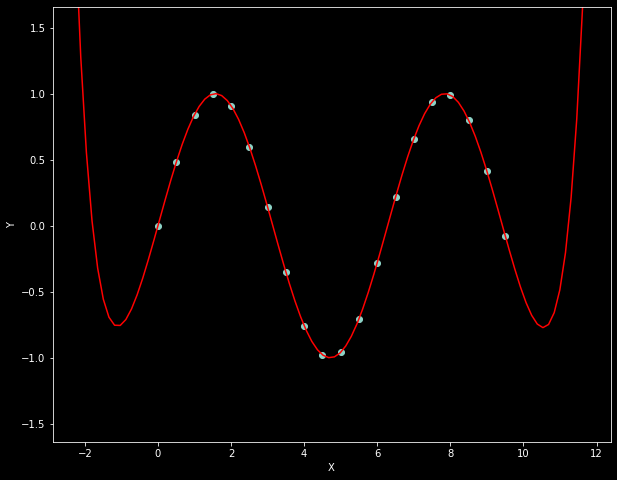

(array([ 2.11999611e-06,  9.96632280e-01,  1.55187116e-02, -1.94178848e-01,
         2.55432248e-02, -5.73009175e-03,  4.86197895e-03, -1.27007133e-03,
         1.45909761e-04, -7.93574637e-06,  1.68321186e-07]),
 {'r2': 0.9999999959659528, 'syx': 6.238970351706717e-05})

In [2]:
X = np.arange(0, 10, 0.5)
Y = np.sin(X)
cf = CurveFitting()
cf.fit(X, Y, order=10, plot=True)

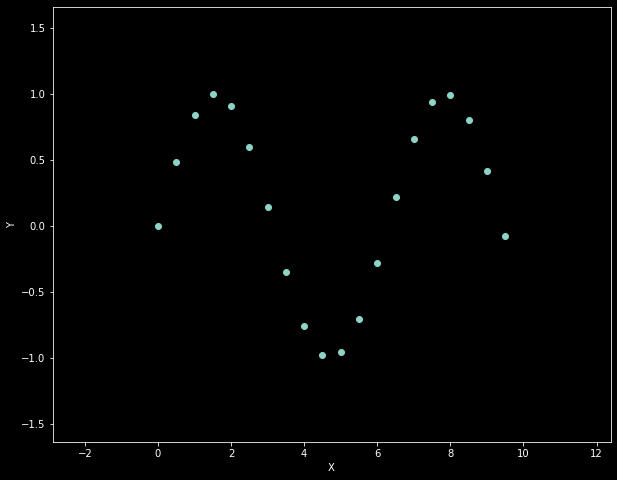

array([ 2.11999611e-06,  4.79409569e-01,  8.41517447e-01,  9.97438478e-01,
        9.09299085e-01,  5.98523168e-01,  1.41117881e-01, -3.50833842e-01,
       -7.56815632e-01, -9.77483036e-01, -9.58890428e-01, -7.05575634e-01,
       -2.79466893e-01,  2.15140481e-01,  6.57049796e-01,  9.37981181e-01,
        9.89285689e-01,  7.98563572e-01,  4.12088036e-01, -7.51466004e-02])

In [3]:
Xl = np.linspace(0, 10, 100)
cf.predict(X, plot=True)

In [19]:
plt.rcdefaults()

In [11]:
f = lambda x: np.sin(x)
a = 1
b = 0
rf = RootFinding()
rf.get_root(f, a, b)

-5.048709793414476e-29

In [1]:
from tools.misc import notification

In [2]:
n = notification.Notification()

In [3]:
n.send_whatsapp_text("Hello")

SMce5061691c0b45759adc62d1da13bfba
